<a href="https://colab.research.google.com/github/2303A52083/23CSBTB39-AIML/blob/main/AIML_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Implement Logistic Regression Model Using Titanic Ship Dataset
Part 1 – Import the required Python, Pandas, Matplotlib, Seaborn packages.
[CO2]
1. Load the Titanic Ship Passengers dataset into a dataframe using pandas
2. Check the data types of each feature(column) in the dataset.
3. Generate a summary of the dataset for min, max, stddev,
quartile vales for 25%,50%,75%,90%,
4. List the names of columns/features in the dataset
5. Perform Exploratory analysis - plot numeric features, check relative size of survived/unsurvived, check if any pattern on gender. passenger class, class-wise survival rate, sibilings, overall age distribution, class-wise age distribution - apply bar plot, histogram,
box plots to visualize.
6. Perform data wrangling - impute age data, drop unnecessary features, recode the categorical features to a class

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%     

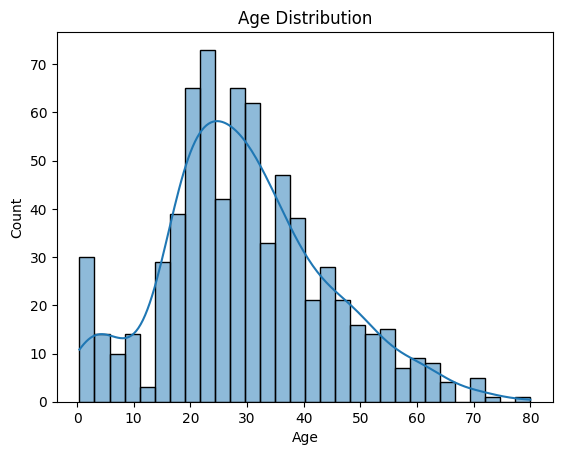

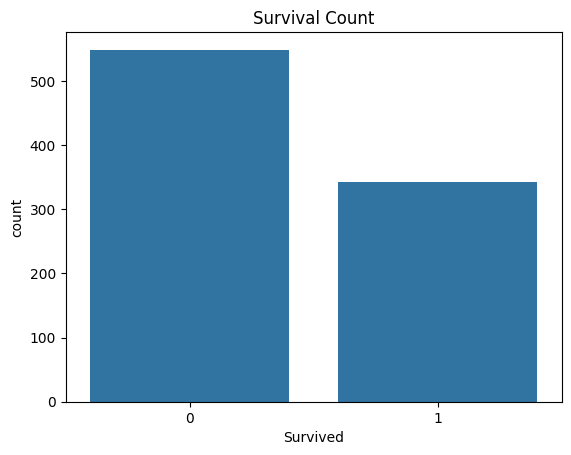

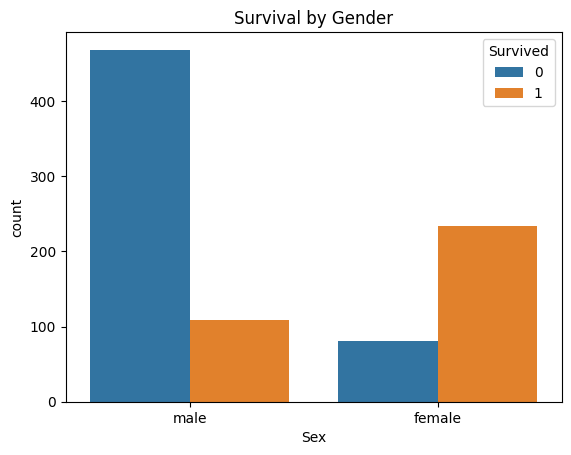

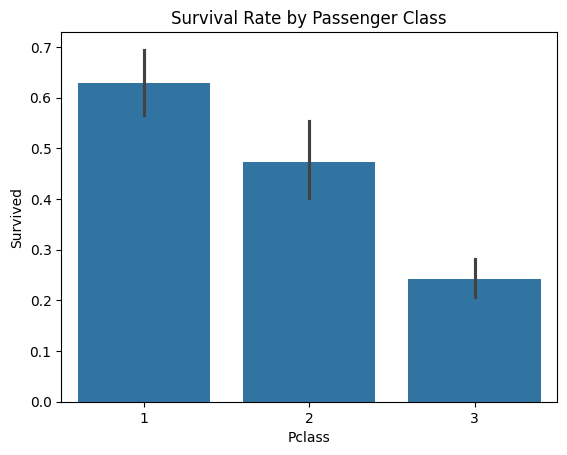

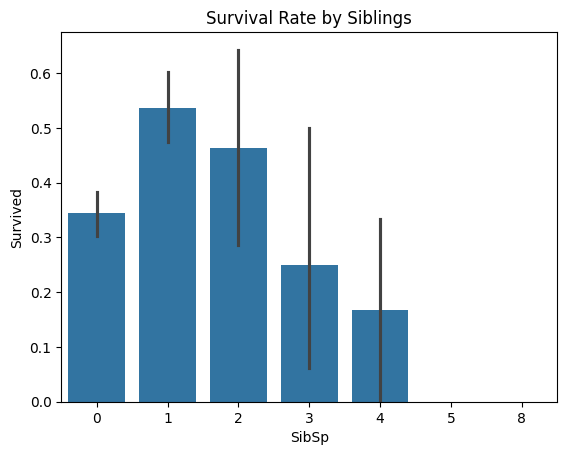

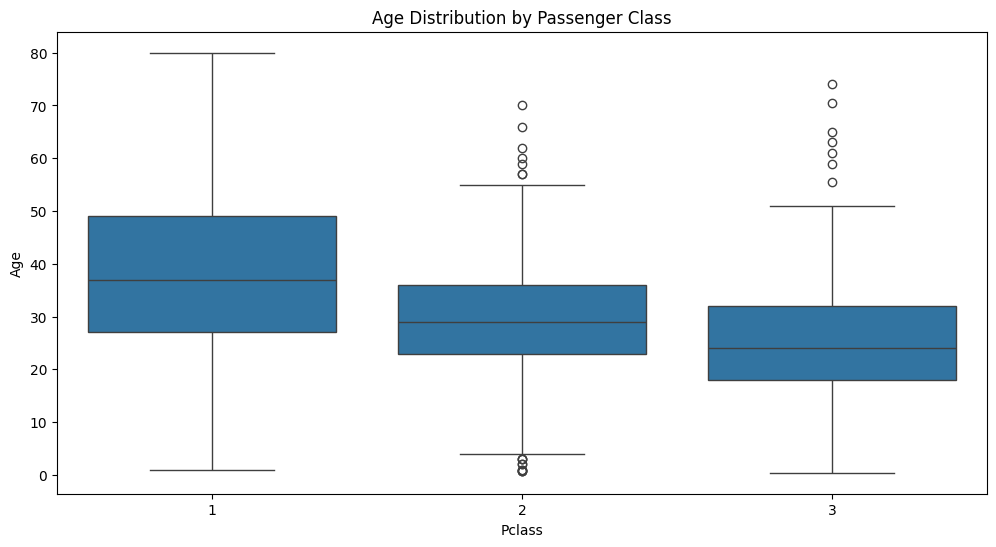

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
df = pd.read_csv('titanic.csv')
print(df.dtypes)
summary = df.describe(include='all')
print(summary)
columns = df.columns.tolist()
print(columns)
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by Siblings')
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df.dropna(inplace=True)
X = df.drop('Survived', axis=1)
y = df['Survived']


Part 2 – Model training and Fit the data to Model. [CO3]
1. Split the data generated from list created as X, Y is distributed using train test split
function as X train, Y train, X test, Y test
2. Apply the logistic regression model of sklearn package
3. Fit the data to the Logistic Model using fit
4. Compute the F1 score as function of penalty , F1 as function of test data. Plot both
outcomes using scatter plots.

F1 Score: 0.7210884353741496


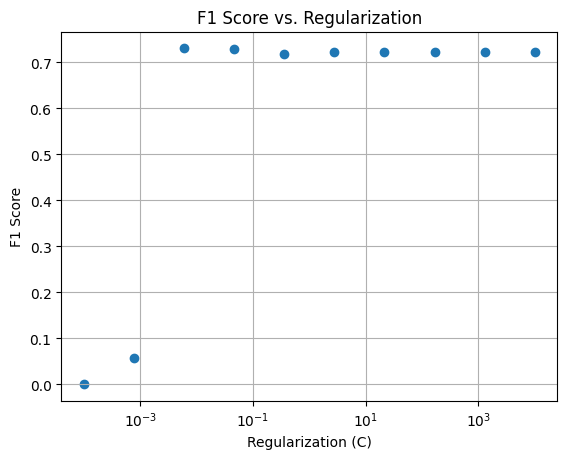

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
X = df.drop('Survived', axis=1)
y = df['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
penalty_values = np.logspace(-4, 4, 10)
f1_scores = []
for penalty in penalty_values:
    model = LogisticRegression(C=penalty, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
plt.scatter(penalty_values, f1_scores)
plt.xscale('log')
plt.xlabel('Regularization (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Regularization')
plt.grid()
plt.show()